# Global YouTube Statistics 2023

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [4]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='Unicode_escape')

In [5]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


### Data Cleaning

In [6]:
df.shape

(995, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [8]:
# Checking for null values

df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [9]:
# Checking for duplicate values

df.duplicated().sum()

0

In [10]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
# Dropping Unnecessary coloumns

df.drop(['Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude','subscribers_for_last_30_days'], axis=1,inplace=True)

In [12]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date'],
      dtype='object')

In [13]:
df.isnull().sum()

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                             46
Title                                 0
uploads                               0
Country                             122
Abbreviation                        122
channel_type                         30
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
created_year                          5
created_month                         5
created_date                          5
dtype: int64

In [14]:
# replacing empty values with 'NA'

# 'category','Country', 'Abbreviation', 'channel_type'

df[['category','Country', 'Abbreviation', 'channel_type']] = df[['category','Country', 'Abbreviation', 'channel_type']].fillna('NA')

In [15]:
df.isnull().sum()

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                              0
Title                                 0
uploads                               0
Country                               0
Abbreviation                          0
channel_type                          0
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
created_year                          5
created_month                         5
created_date                          5
dtype: int64

In [16]:
# Replacing missing values with mode
# 'country_rank', 'channel_type_rank' ,'video_views_for_the_last_30_days'

df['video_views_for_the_last_30_days'] = df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].mode()[0])
df['channel_type_rank'] = df['channel_type_rank'].fillna(df['channel_type_rank'].mode()[0])
df['country_rank'] = df['country_rank'].fillna(df['country_rank'].mode()[0])

In [17]:
df.isnull().sum()

rank                                0
Youtuber                            0
subscribers                         0
video views                         0
category                            0
Title                               0
uploads                             0
Country                             0
Abbreviation                        0
channel_type                        0
video_views_rank                    1
country_rank                        0
channel_type_rank                   0
video_views_for_the_last_30_days    0
lowest_monthly_earnings             0
highest_monthly_earnings            0
lowest_yearly_earnings              0
highest_yearly_earnings             0
created_year                        5
created_month                       5
created_date                        5
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

rank                                0
Youtuber                            0
subscribers                         0
video views                         0
category                            0
Title                               0
uploads                             0
Country                             0
Abbreviation                        0
channel_type                        0
video_views_rank                    0
country_rank                        0
channel_type_rank                   0
video_views_for_the_last_30_days    0
lowest_monthly_earnings             0
highest_monthly_earnings            0
lowest_yearly_earnings              0
highest_yearly_earnings             0
created_year                        0
created_month                       0
created_date                        0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              990 non-null    int64  
 1   Youtuber                          990 non-null    object 
 2   subscribers                       990 non-null    int64  
 3   video views                       990 non-null    float64
 4   category                          990 non-null    object 
 5   Title                             990 non-null    object 
 6   uploads                           990 non-null    int64  
 7   Country                           990 non-null    object 
 8   Abbreviation                      990 non-null    object 
 9   channel_type                      990 non-null    object 
 10  video_views_rank                  990 non-null    float64
 11  country_rank                      990 non-null    float64
 12  channel_type_

In [21]:
# Changing datatype of created_date column to datetime

df.created_date = pd.to_datetime(df.created_date)

In [22]:
df['created_date'].dtypes

dtype('<M8[ns]')

In [23]:
df.shape

(990, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rank                              990 non-null    int64         
 1   Youtuber                          990 non-null    object        
 2   subscribers                       990 non-null    int64         
 3   video views                       990 non-null    float64       
 4   category                          990 non-null    object        
 5   Title                             990 non-null    object        
 6   uploads                           990 non-null    int64         
 7   Country                           990 non-null    object        
 8   Abbreviation                      990 non-null    object        
 9   channel_type                      990 non-null    object        
 10  video_views_rank                  990 non-null    float

## Data Exploration

In [25]:
# creating a copy

dfc = df.copy()

In [26]:
dfc.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,Mar,1970-01-01 00:00:00.000000013
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,2006.0,Mar,1970-01-01 00:00:00.000000005
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,Feb,1970-01-01 00:00:00.000000020
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,Sep,1970-01-01 00:00:00.000000001
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,Sep,1970-01-01 00:00:00.000000020


In [27]:
dfc.shape

(990, 21)

In [28]:
# Creating a list of all countries in their different continents.

Africa = ["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde","Cameroon","Central African Republic",
          "Chad","Comoros","Congo, Dem. Rep", "Congo, Rep.","Cote d'Ivoire","Djibouti","Egypt","Equatorial Guinea","Eritrea",
          "Eswatini (formerly Swaziland)","Ethiopia","Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Kenya", "Lesotho",
          "Liberia",'Libya',"Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia",
          "Niger","Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia","South Africa",
          "South Sudan","Sudan","Tanzania""Togo","Tunisia","Uganda","Zambia","Zimbabwe"]

Europe = ["Albania","Andorra", "Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
          "Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Georgia","Germany",
          "Greece","Hungary","Iceland","Ireland","Italy","Kazakhstan","Kosovo","Latvia","Liechtenstein","Lithuania",
          "Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","Macedonia, FYR","Norway","Poland","Portugal",
          "Romania","Russia","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey",
          "Ukraine","United Kingdom","Vatican City"]

Asia = ["Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh", "Bhutan","Brunei","Cambodia","China","Cyprus",
        "Georgia","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Kuwait","Kyrgyzstan","Laos",
        "Lebanon","Malaysia","Maldives","Mongolia","Myanmar","Nepal","North Korea","Oman","Pakistan","Palestine","Philippines",
        "Qatar","Russia","Saudi Arabia","Singapore","South Korea","Sri Lanka","Syria","Taiwan","Tajikistan","Thailand",
        "Timor-Leste","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Vietnam","Yemen"]

North_America = ["Antigua and Barbuda","Bahamas","Barbados","Belize","Canada","Costa Rica","Cuba","Dominica",
                 "Dominican Republic","El Salvador","Grenada","Guatemala","Haiti","Honduras","Jamaica","Mexico",
                 "Nicaragua","Panama","Saint Vincent and the Grenadines","United States"]

South_America = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname",
                 "Uruguay","Venezuela"]

Australia_and_Oceania = ["Australia","Fiji","Kiribati","Marshall Islands","Micronesia","Nauru","New Zealand","Palau",
                       "Papua New Guinea","Samoa","Solomon Islands","Tonga","Tuvalu","Vanuatu"]


In [29]:
# creating a function to fill the continent column with the appropriate continent of the country

def results(Country):
    if Country in Africa:
        return 'Africa'
    elif Country in Europe:
        return 'Europe'
    elif Country in Asia:
        return 'Asia'
    elif Country in North_America:
        return 'North_America'
    elif Country in South_America:
        return 'South_America'
    else:
        return 'Australia_and_Oceania'


dfc['Continent'] = dfc.Country.apply(lambda x:results(x))

In [30]:
dfc.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Continent
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,Mar,1970-01-01 00:00:00.000000013,Asia
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,2006.0,Mar,1970-01-01 00:00:00.000000005,North_America
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,Feb,1970-01-01 00:00:00.000000020,North_America
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,Sep,1970-01-01 00:00:00.000000001,North_America
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,Sep,1970-01-01 00:00:00.000000020,Asia


### Univariate Analysis

#### Q.1 Which category is most popular ?

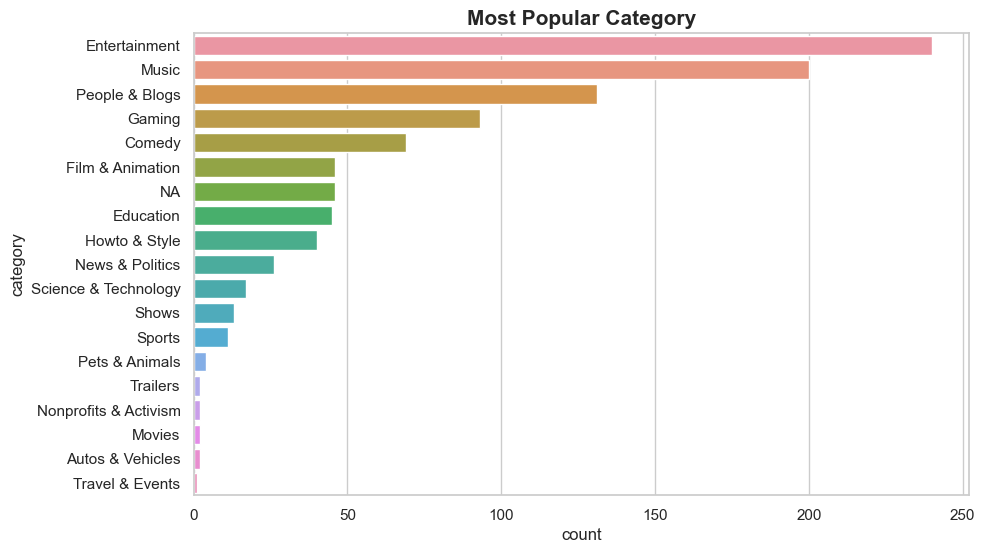

In [52]:
category = dfc['category'].value_counts().index

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data = dfc, y = 'category', order = category)
plt.title('Most Popular Category', fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Which Countries have the most top youtubers ?

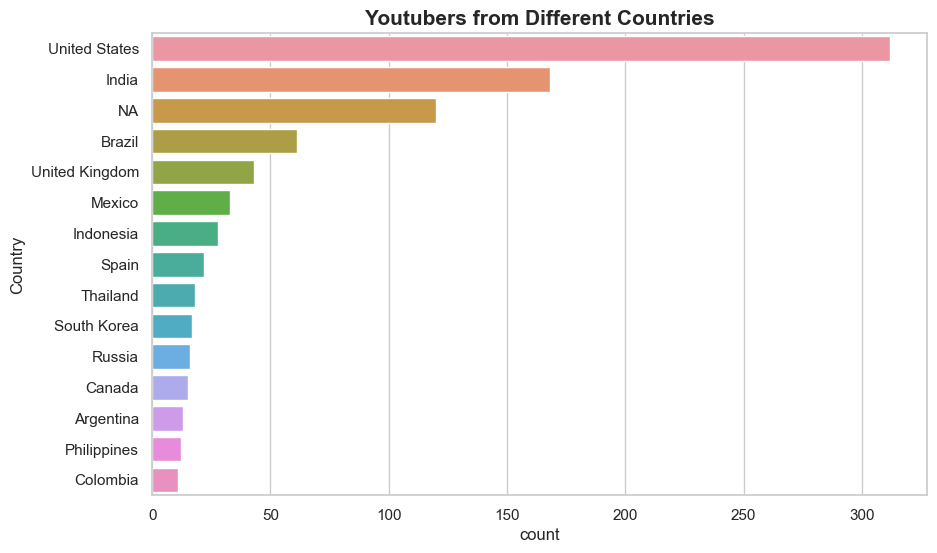

In [53]:
country = dfc['Country'].value_counts().head(15).index

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data = dfc, y = 'Country', order = country)
plt.title('Youtubers from Different Countries', fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Which Continent has the most top YouTubers ?

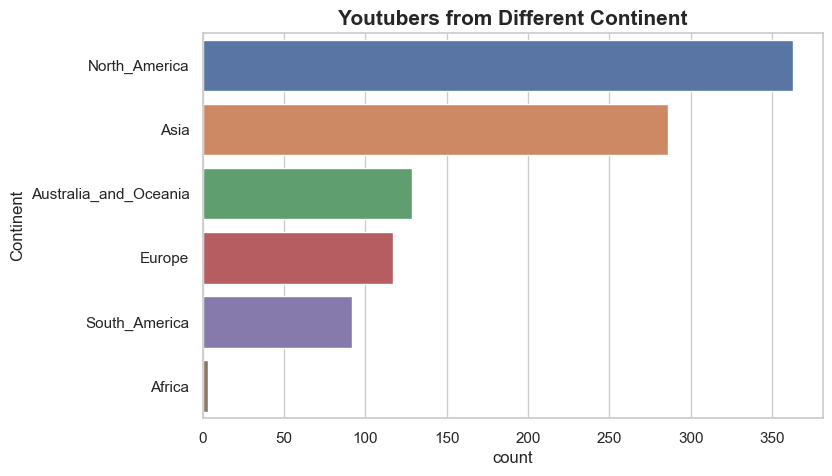

In [55]:
con = dfc['Continent'].value_counts().index

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(data = dfc, y = 'Continent', order = con)
plt.title('Youtubers from Different Continent', fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Measuring Mean, Median and Mode of numeric columns

In [56]:
columns = [
   'rank', 'subscribers', 'video views', 'uploads', 'lowest_monthly_earnings',
   'highest_monthly_earnings', 'lowest_yearly_earnings','highest_yearly_earnings'
]

In [58]:
for column in columns:
  print("\n\n")
  print(column, "mean is: "+ str(round(dfc[column].mean(), 2)))
  print(column, "meadian is: "+ str(dfc[column].median()))
  print(column, "mode is: " + str(dfc[column].mode()))




rank mean is: 497.77
rank meadian is: 497.5
rank mode is: 0        1
1        2
2        3
3        4
4        5
      ... 
985    991
986    992
987    993
988    994
989    995
Name: rank, Length: 990, dtype: int64



subscribers mean is: 23007575.76
subscribers meadian is: 17700000.0
subscribers mode is: 0    12500000
Name: subscribers, dtype: int64



video views mean is: 11058725720.0
video views meadian is: 7761448300.0
video views mode is: 0    0.0
Name: video views, dtype: float64



uploads mean is: 9233.53
uploads meadian is: 737.0
uploads mode is: 0    0
Name: uploads, dtype: int64



lowest_monthly_earnings mean is: 37072.44
lowest_monthly_earnings meadian is: 13450.0
lowest_monthly_earnings mode is: 0    0.0
Name: lowest_monthly_earnings, dtype: float64



highest_monthly_earnings mean is: 592786.68
highest_monthly_earnings meadian is: 215200.0
highest_monthly_earnings mode is: 0    0.0
Name: highest_monthly_earnings, dtype: float64



lowest_yearly_earnings mean is: 44

#### Distribution of Subscribers

C:\Users\Sandesh\AppData\Local\Temp\ipykernel_17908\1323477631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfc['subscribers'])


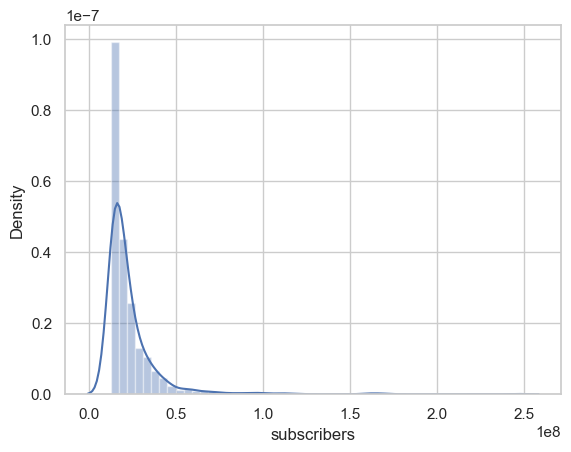

In [64]:
sns.distplot(dfc['subscribers'])
plt.show()

#### Distribution of uploads

Top ten values for uploads is:{0: 38, 1: 26, 2: 9, 3: 8, 6: 6, 982: 4, 287: 4, 8: 4, 744: 3, 975: 3}



C:\Users\Sandesh\AppData\Local\Temp\ipykernel_17908\1539164103.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column])


uploads
0    38
1    26
2     9
3     8
6     6
Name: count, dtype: int64

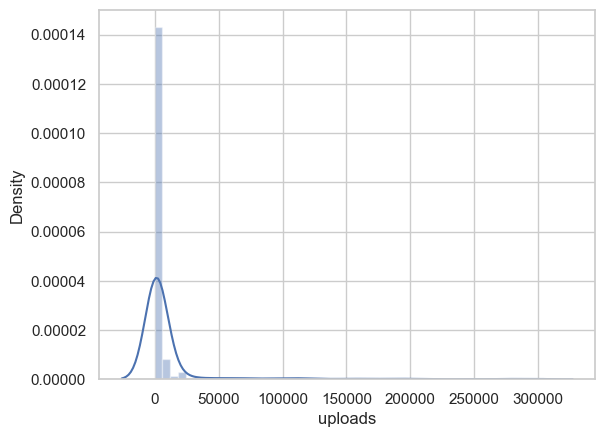

In [67]:
def uni_viz(dataframe, column, bin=None):
  sns.distplot(dataframe[column])

  values = dataframe[column].value_counts(ascending = False)
  print('Top ten values for {} is:{}\n'.format(column, values.head(10).to_dict()))

  return values.head(5)

uni_viz(dfc,'uploads')

#### Distribution of highest yearly earnings

Top ten values for highest_yearly_earnings is:{0.0: 74, 1300000.0: 21, 2100000.0: 17, 1400000.0: 15, 1200000.0: 13, 1100000.0: 12, 2300000.0: 12, 1700000.0: 12, 2200000.0: 12, 1500000.0: 12}



C:\Users\Sandesh\AppData\Local\Temp\ipykernel_17908\1539164103.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column])


highest_yearly_earnings
0.0          74
1300000.0    21
2100000.0    17
1400000.0    15
1200000.0    13
Name: count, dtype: int64

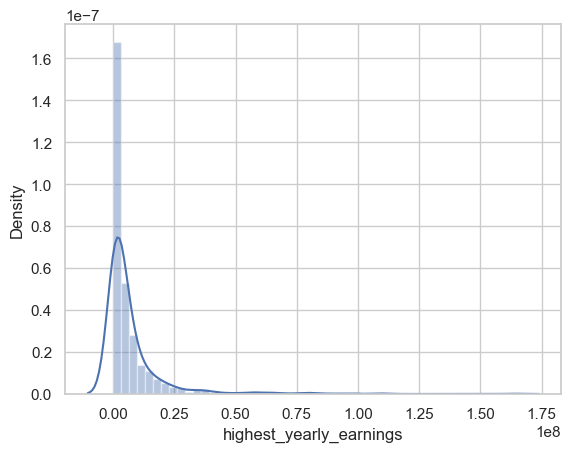

In [71]:
uni_viz(dfc,'highest_yearly_earnings')

## Bivariate Analysis

#### Relationship between subscribers and uploads

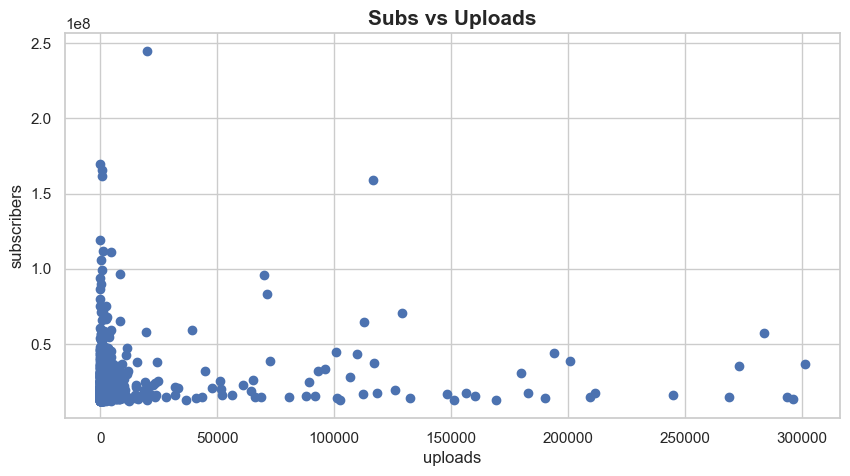

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(data = dfc, x='uploads' , y='subscribers' )
plt.xlabel('uploads')
plt.ylabel('subscribers')
plt.title('Subs vs Uploads',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Relationship b/w Uploads and earings

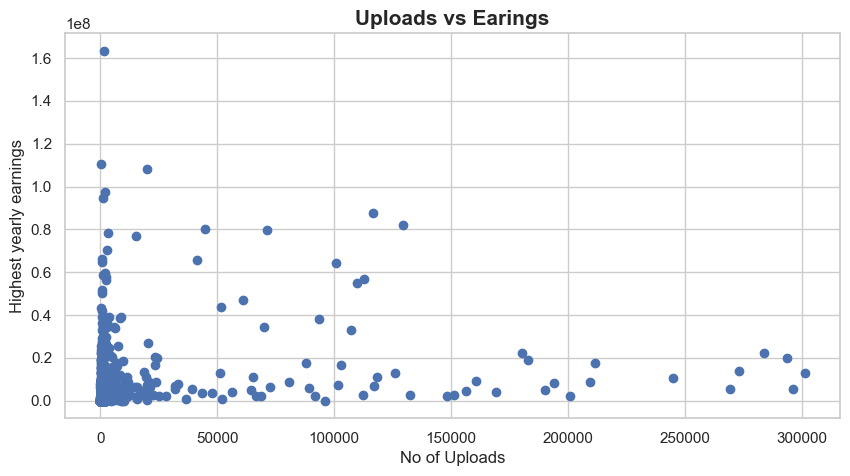

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(data = dfc, x='uploads' , y='highest_yearly_earnings' )
plt.xlabel('No of Uploads')
plt.ylabel('Highest yearly earnings')
plt.title('Uploads vs Earings',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Relationship between Subs and Yearly earnings

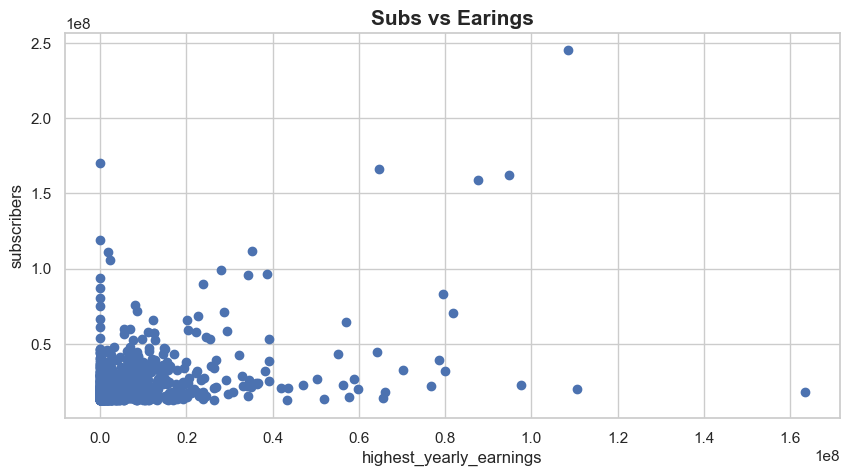

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(data = dfc, x='highest_yearly_earnings' , y='subscribers' )
plt.xlabel('highest_yearly_earnings')
plt.ylabel('subscribers')
plt.title('Subs vs Earings',fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

#### Checking the correlation using the heatmap

In [88]:
c = ['subscribers', 'video views','uploads','video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings','created_date']

matrix = dfc[c].corr()

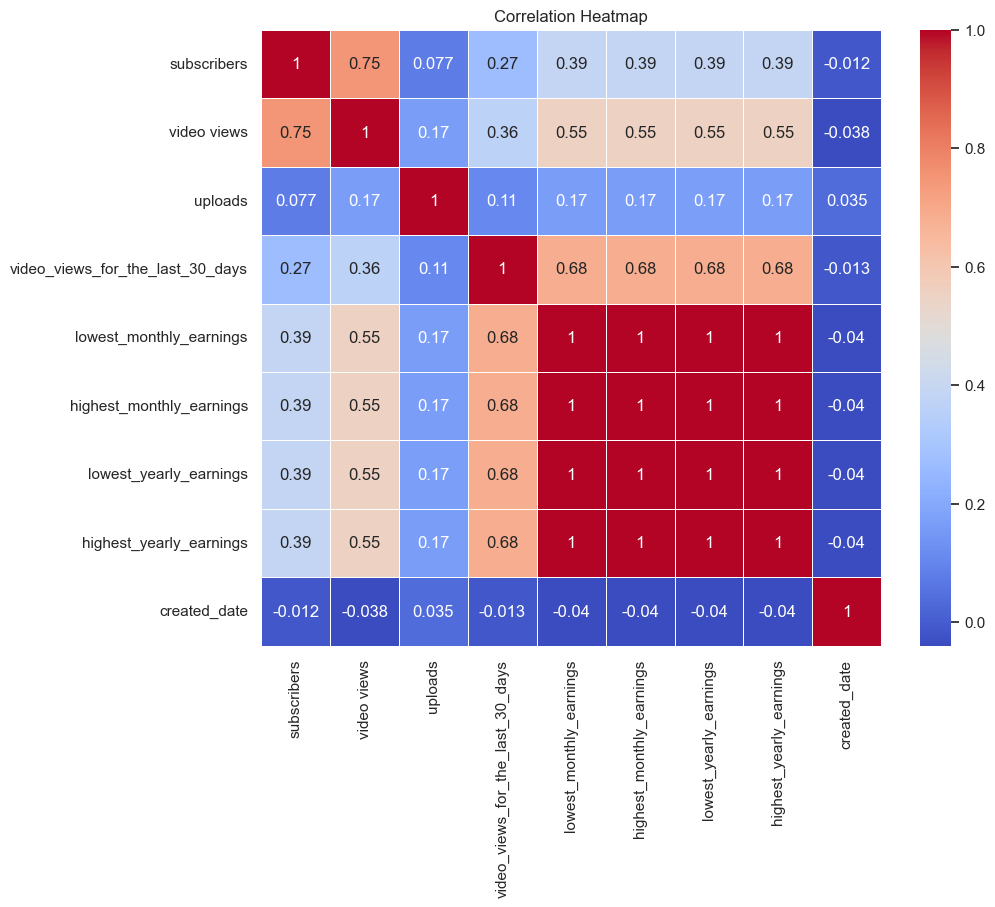

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Multivariate Analysis

C:\Users\Sandesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


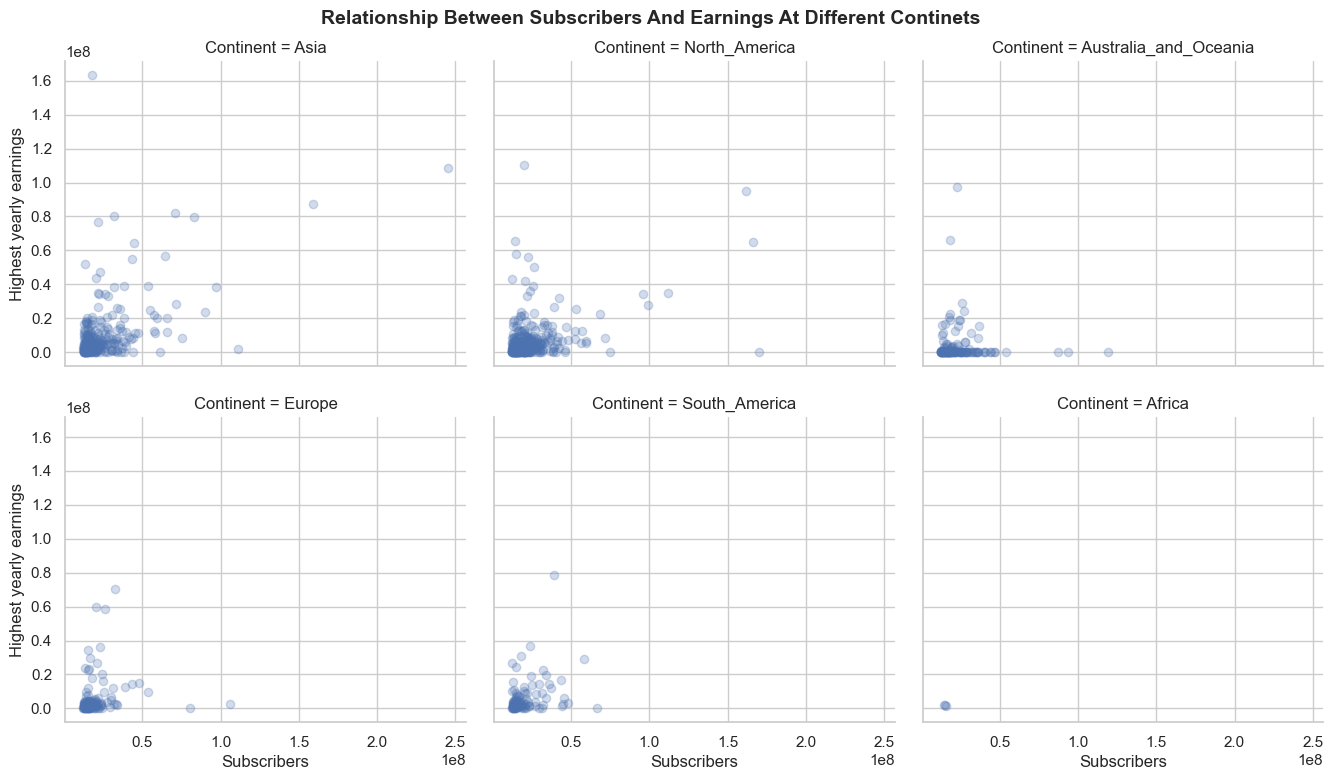

In [94]:
g = sns.FacetGrid(data=dfc, col='Continent', col_wrap = 3)
g.map(plt.scatter, 'subscribers', 'highest_yearly_earnings', alpha=0.25)
g.set_xlabels('Subscribers')
g.set_ylabels('Highest yearly earnings')
g.fig.set_size_inches(14,8);
plt.suptitle('Relationship between Subscribers and earnings at different continets'.title(), y=1, fontsize=14, weight='bold')
plt.show()